# Load Dataset

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
df = pd.read_csv('tia_posts.csv', parse_dates=['date_gmt'])
df.head()

,id,date_gmt,title,content,author_name,editor,comments_count,categories,show_ads,is_subscriber_exclusive,read_time
0,737074,2022-03-10 10:26:12,Krafton-backed 🇮🇳 game streaming firm raises $42m,"India-based Loco, a streaming platform for vid...",Kul Bhushan,Samreen Ahmad and Lorenzo Kyle Subido,0,"['Blockchain', 'Gaming', 'Investments', 'News'...",True,False,2
1,737077,2022-03-10 10:01:08,Malaysian gov’t taps AWS to boost cloud adoption,Amazon Web Services (AWS) and the Malaysian go...,Roehl Niño Bautista,Deepti Sri and Lorenzo Kyle Subido,0,"['Consumer Tech', 'News']",True,False,1
2,737066,2022-03-10 09:30:59,🇮🇳 Roundup: PUBG developer bets on audio conte...,"Startups in India, including Loco and Kuku FM,...",Samreen Ahmad,Deepti Sri and Lorenzo Kyle Subido,0,"['Investments', 'News', 'Startups']",True,False,1
3,736884,2022-03-10 09:30:23,The first-hand accounts of SEA’s female entrep...,"Sign up for the Daily Newsletter, sent exclusi...",Winston Zhang,Jaclyn Tiu,0,['Newsletters'],True,False,6
4,736984,2022-03-10 08:51:06,Tiger Global leads $20m series B extension of ...,"Cialfo, a Singapore-based edtech startup, has ...",Aditya Hadi Pratama,Miguel Cordon and Jaclyn Tiu,0,"['Investments', 'News', 'Startups']",True,False,3


In [3]:
df.shape

(900, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       900 non-null    int64         
 1   date_gmt                 900 non-null    datetime64[ns]
 2   title                    900 non-null    object        
 3   content                  900 non-null    object        
 4   author_name              900 non-null    object        
 5   editor                   841 non-null    object        
 6   comments_count           900 non-null    int64         
 7   categories               900 non-null    object        
 8   show_ads                 900 non-null    bool          
 9   is_subscriber_exclusive  900 non-null    bool          
 10  read_time                900 non-null    int64         
dtypes: bool(2), datetime64[ns](1), int64(3), object(5)
memory usage: 65.2+ KB


# EDA

## Question 1: What categories are interesting to user?

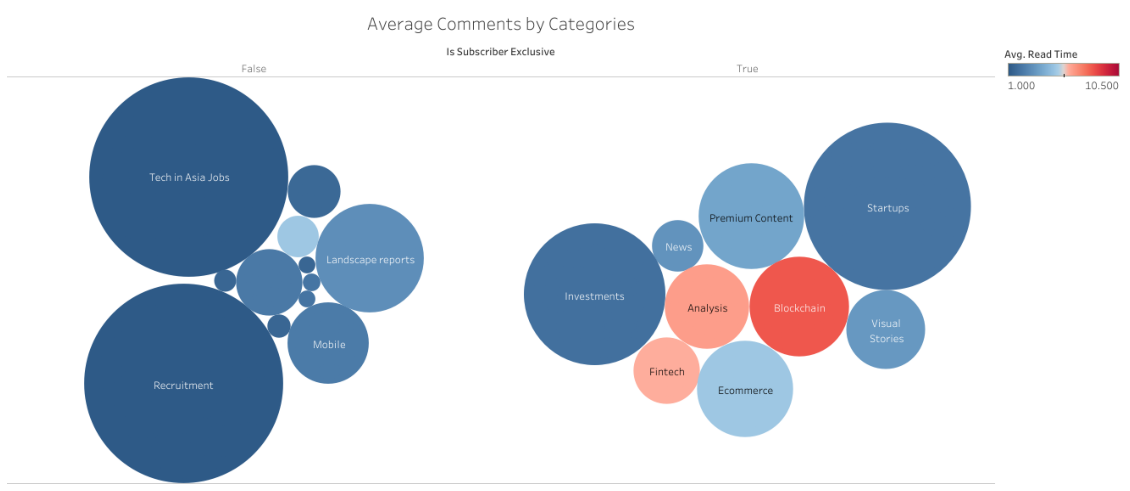

In [5]:
plt.figure(figsize=(20, 16))
bubbleplot = mpimg.imread('img/avg_comment_by_cat.png')
imgplot = plt.imshow(bubbleplot)
plt.axis('off')
plt.show()

- Size of Bubble: Average Comments
- Color of Bubble: Average Read Time (Blue < Red)

## Answer 1: 
- In posts that are not subscriber exclusive Tech in Asia Jobs and Recruitment have most average comments & least read time.
- In posts that are subscriber exclusive Invesments and Startups have most average comments & least read time.
- Fintech, Analysis & Blockchain have good average comments, but it also have a high read time.
- We can improve Fintech, Analysis & Blockchain categories by make it more engaging to user.


## Question 2: Are user get articles they want to read?

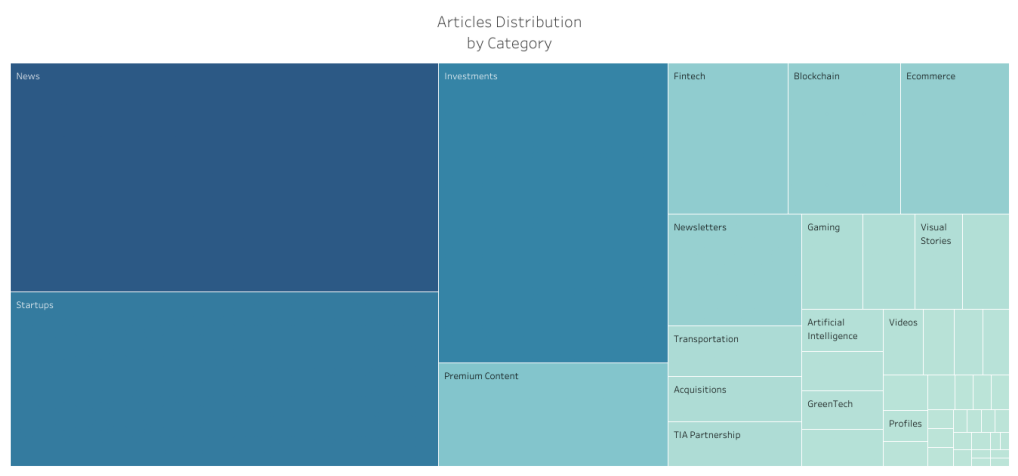

In [6]:
plt.figure(figsize=(18, 10))
treemap = mpimg.imread('img/articles_distribution.png')
imgplot = plt.imshow(treemap)
plt.axis('off')
plt.show()

## Answer 2: 
- For the most part user already get articles they want to see, except for TIA Jobs & Recruitment.
- We can improve by adding more articles for those categories.

## Question 3: What is the best time to post article?

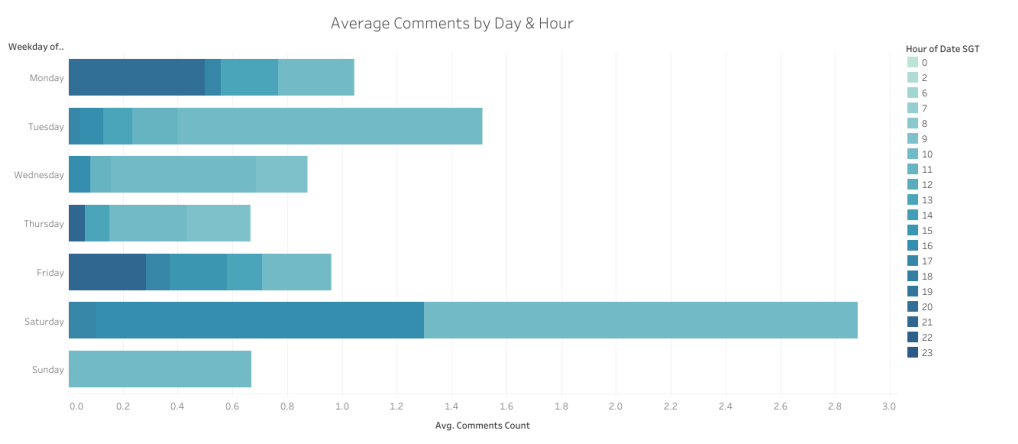

In [7]:
plt.figure(figsize=(18, 10))
avg_comment = mpimg.imread('img/avg_comment_day_hour.png')
imgplot = plt.imshow(avg_comment)
plt.axis('off')
plt.show()

## Answer 3:
- User comments more in the morning, except for some days.
- In Monday, Friday there are more comments in the night than in morning.
- Friday is make sense but Monday, why user comments more on Monday night?

## Question 4: Articles posted at the correct day ?

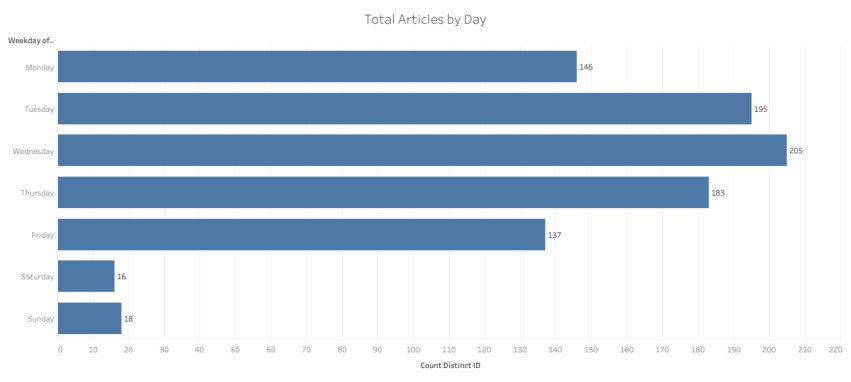

In [8]:
plt.figure(figsize=(15, 8))
avg_comment = mpimg.imread('img/total_posts_day.png')
imgplot = plt.imshow(avg_comment)
plt.axis('off')
plt.show()

## Answer 4:
- Looking at Average Comment by Day & Hour, we still need to get more articles at Saturday.
- We need other metrics like Click Rate or How many times user shared the article, to confirm.
- We can improve articles on Saturday and Sunday using automated bot to post articles.

## Question 5: Who are the top 10 author by number of articles posted ?

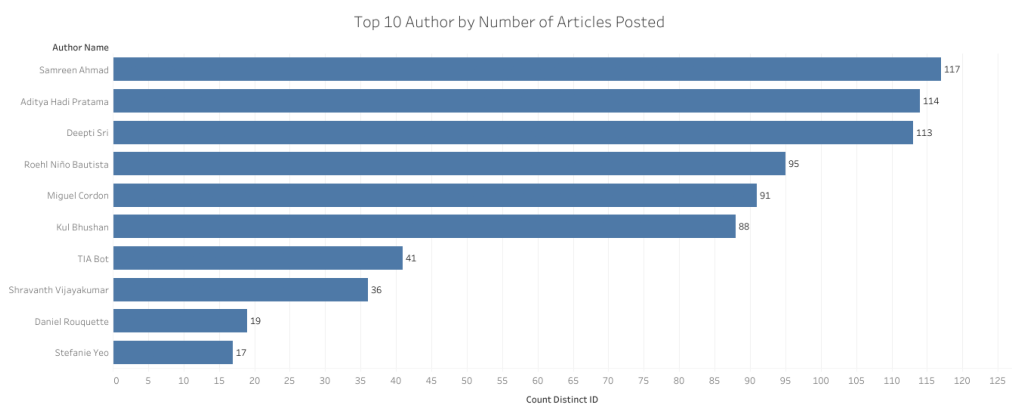

In [9]:
plt.figure(figsize=(18, 10))
top10 = mpimg.imread('img/top10_author.png')
imgplot = plt.imshow(top10)
plt.axis('off')
plt.show()

## Answer 5:
- Those are the top 10 author by number of articles posted.
- Since they are people that have the most impact to the TIA articles, I want to analyze if they are good writers and try to find what makes them good.

# Analyzing Top 10 Author

In [10]:
df_new = df.copy()
df_new = df_new[['author_name', 'content']]
df_new.shape

(900, 2)

In [11]:
df_new.head()

,author_name,content
0,Kul Bhushan,"India-based Loco, a streaming platform for vid..."
1,Roehl Niño Bautista,Amazon Web Services (AWS) and the Malaysian go...
2,Samreen Ahmad,"Startups in India, including Loco and Kuku FM,..."
3,Winston Zhang,"Sign up for the Daily Newsletter, sent exclusi..."
4,Aditya Hadi Pratama,"Cialfo, a Singapore-based edtech startup, has ..."


In [12]:
top10_author = df_new.author_name.value_counts()[:10].index
top10_author

Index(['Samreen Ahmad', 'Aditya Hadi Pratama', 'Deepti Sri',
       'Roehl Niño Bautista', 'Miguel Cordon', 'Kul Bhushan', 'TIA Bot',
       'Shravanth Vijayakumar', 'Daniel Rouquette', 'Stefanie Yeo'],
      dtype='object')

In [13]:
df_new = df_new[df_new['author_name'].isin(top10_author)]
df_new.head()

,author_name,content
0,Kul Bhushan,"India-based Loco, a streaming platform for vid..."
1,Roehl Niño Bautista,Amazon Web Services (AWS) and the Malaysian go...
2,Samreen Ahmad,"Startups in India, including Loco and Kuku FM,..."
4,Aditya Hadi Pratama,"Cialfo, a Singapore-based edtech startup, has ..."
5,Aditya Hadi Pratama,"Aria, an Indonesia-based agritech startup, has..."


## Corpus

In [14]:
data = df_new.groupby('author_name')['content'].apply(lambda x: ','.join(x.astype(str))).reset_index()
data

,author_name,content
0,Aditya Hadi Pratama,"Cialfo, a Singapore-based edtech startup, has ..."
1,Daniel Rouquette,This is the Daily News Roundup. Delivered ever...
2,Deepti Sri,Singapore-based insurtech firm Igloo has raise...
3,Kul Bhushan,"India-based Loco, a streaming platform for vid..."
4,Miguel Cordon,"Singapore-based Silent Eight, a startup offeri..."
5,Roehl Niño Bautista,Amazon Web Services (AWS) and the Malaysian go...
6,Samreen Ahmad,"Startups in India, including Loco and Kuku FM,..."
7,Shravanth Vijayakumar,"Sign up for the Daily Newsletter, sent exclusi..."
8,Stefanie Yeo,As part of Tech in Asia’s 2022 International W...
9,TIA Bot,Southeast Asia has seen its fair share of M&am...


In [15]:
data.content[0][:300]

'Cialfo, a Singapore-based edtech startup, has raised another US$20 million in series B funding led by US-based investment firm Tiger Global after it raised US$40 million in January this year.\nIn total, the company has raised US$77 million in funding to date. VentureCap Insights pegged the firm’s val'

In [16]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [17]:
data['content'] = data.content.apply(round1)
data

,author_name,content
0,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...
1,Daniel Rouquette,this is the daily news roundup delivered every...
2,Deepti Sri,singaporebased insurtech firm igloo has raised...
3,Kul Bhushan,indiabased loco a streaming platform for video...
4,Miguel Cordon,singaporebased silent eight a startup offering...
5,Roehl Niño Bautista,amazon web services aws and the malaysian gove...
6,Samreen Ahmad,startups in india including loco and kuku fm r...
7,Shravanth Vijayakumar,sign up for the daily newsletter sent exclusiv...
8,Stefanie Yeo,as part of tech in asia’s international women...
9,TIA Bot,southeast asia has seen its fair share of mamp...


In [18]:
# Apply a second round of cleaning
def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [19]:
# Let's take a look at the updated text
data['content'] = data.content.apply(round2)
data

,author_name,content
0,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...
1,Daniel Rouquette,this is the daily news roundup delivered every...
2,Deepti Sri,singaporebased insurtech firm igloo has raised...
3,Kul Bhushan,indiabased loco a streaming platform for video...
4,Miguel Cordon,singaporebased silent eight a startup offering...
5,Roehl Niño Bautista,amazon web services aws and the malaysian gove...
6,Samreen Ahmad,startups in india including loco and kuku fm r...
7,Shravanth Vijayakumar,sign up for the daily newsletter sent exclusiv...
8,Stefanie Yeo,as part of tech in asias international womens...
9,TIA Bot,southeast asia has seen its fair share of mamp...


In [20]:
idx = ['aditya', 'daniel', 'deepti', 'kul', 'miguel', 'roehl', 'samreen', 'shravanth', 'stefanie', 'tia bot']
data.index = idx

In [21]:
data

,author_name,content
aditya,Aditya Hadi Pratama,cialfo a singaporebased edtech startup has rai...
daniel,Daniel Rouquette,this is the daily news roundup delivered every...
deepti,Deepti Sri,singaporebased insurtech firm igloo has raised...
kul,Kul Bhushan,indiabased loco a streaming platform for video...
miguel,Miguel Cordon,singaporebased silent eight a startup offering...
roehl,Roehl Niño Bautista,amazon web services aws and the malaysian gove...
samreen,Samreen Ahmad,startups in india including loco and kuku fm r...
shravanth,Shravanth Vijayakumar,sign up for the daily newsletter sent exclusiv...
stefanie,Stefanie Yeo,as part of tech in asias international womens...
tia bot,TIA Bot,southeast asia has seen its fair share of mamp...


In [22]:
# Let's pickle it for later use
data.to_pickle("corpus.pkl")

## Document-Term Matrix

In [23]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data.content)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data.index
data_dtm

C:\Users\ASUS\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aadit,aakash,aampt,aapl,aapsky,aarna,aaron,aatmanirbhar,aave,aavegotchi,...,zuckerbergthese,zuddl,zuhaib,zuper,zurichbased,zwc,zymrat,zynga,zynn,zypp
aditya,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
daniel,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
deepti,4,1,0,0,0,0,2,0,0,0,...,0,0,0,0,1,2,0,0,0,1
kul,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
miguel,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
roehl,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
samreen,0,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0
shravanth,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
stefanie,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
tia bot,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# Let's pickle it for later use
import pickle

data_dtm.to_pickle('dtm.pkl')
pickle.dump(cv, open('cv.pkl', 'wb'))

## Most Common Words

In [25]:
# Read in the document-term matrix
data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,aditya,daniel,deepti,kul,miguel,roehl,samreen,shravanth,stefanie,tia bot
aadit,0,0,4,0,0,0,0,1,0,0
aakash,0,0,1,0,1,0,0,0,0,0
aampt,0,0,0,0,0,0,1,0,0,0
aapl,0,0,0,0,0,0,0,1,0,0
aapsky,0,0,0,0,0,1,0,0,0,0


In [26]:
# Find the top 30 words by each author
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

{'aditya': [('million', 263),
  ('company', 197),
  ('raised', 135),
  ('funding', 133),
  ('round', 122),
  ('firm', 122),
  ('credit', 111),
  ('startup', 107),
  ('said', 103),
  ('platform', 99),
  ('ventures', 97),
  ('year', 82),
  ('series', 80),
  ('capital', 76),
  ('plans', 71),
  ('new', 71),
  ('photo', 70),
  ('indonesia', 66),
  ('tech', 66),
  ('currently', 64),
  ('led', 63),
  ('use', 60),
  ('fresh', 59),
  ('investors', 57),
  ('users', 57),
  ('app', 56),
  ('business', 49),
  ('startups', 49),
  ('investment', 49),
  ('cofounder', 49)],
 'daniel': [('tech', 78),
  ('news', 60),
  ('asia', 57),
  ('startups', 51),
  ('premium', 43),
  ('day', 43),
  ('biggest', 43),
  ('february', 37),
  ('global', 34),
  ('access', 34),
  ('firm', 30),
  ('nfts', 26),
  ('startup', 25),
  ('southeast', 25),
  ('workshop', 24),
  ('crypto', 24),
  ('funding', 23),
  ('big', 23),
  ('fintech', 21),
  ('free', 21),
  ('daily', 21),
  ('new', 21),
  ('break', 21),
  ('stories', 21),
  

In [27]:
# Print the top 15 words by each author
for author, top_words in top_dict.items():
    print(author)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

aditya
million, company, raised, funding, round, firm, credit, startup, said, platform, ventures, year, series, capital
---
daniel
tech, news, asia, startups, premium, day, biggest, february, global, access, firm, nfts, startup, southeast
---
deepti
million, company, said, firm, tech, credit, capital, raised, asia, round, platform, new, investors, southeast
---
kul
million, company, firm, startup, said, round, india, platform, credit, raised, capital, new, plans, investors
---
miguel
million, said, company, tech, credit, new, platform, firm, year, round, capital, startup, india, startups
---
roehl
million, credit, platform, firm, said, digital, round, company, india, raised, tech, billion, new, series
---
samreen
million, india, company, tech, said, platform, credit, startup, asia, raised, fintech, billion, firm, round
---
shravanth
million, tech, company, startups, startup, firm, round, capital, asia, funding, southeast, raised, billion, digital
---
stefanie
tech, startup, new, millio

In [28]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each author
words = []
for author in data.columns:
    top = [word for (word, count) in top_dict[author]]
    for t in top:
        words.append(t)
        
words

['million',
 'company',
 'raised',
 'funding',
 'round',
 'firm',
 'credit',
 'startup',
 'said',
 'platform',
 'ventures',
 'year',
 'series',
 'capital',
 'plans',
 'new',
 'photo',
 'indonesia',
 'tech',
 'currently',
 'led',
 'use',
 'fresh',
 'investors',
 'users',
 'app',
 'business',
 'startups',
 'investment',
 'cofounder',
 'tech',
 'news',
 'asia',
 'startups',
 'premium',
 'day',
 'biggest',
 'february',
 'global',
 'access',
 'firm',
 'nfts',
 'startup',
 'southeast',
 'workshop',
 'crypto',
 'funding',
 'big',
 'fintech',
 'free',
 'daily',
 'new',
 'break',
 'stories',
 'read',
 'roundup',
 'trends',
 'digital',
 'website',
 'inbox',
 'million',
 'company',
 'said',
 'firm',
 'tech',
 'credit',
 'capital',
 'raised',
 'asia',
 'round',
 'platform',
 'new',
 'investors',
 'southeast',
 'market',
 'firms',
 'delivery',
 'billion',
 'companies',
 'india',
 'ventures',
 'global',
 'startup',
 'series',
 'including',
 'investment',
 'led',
 'services',
 'startups',
 'funding',

In [29]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('funding', 10),
 ('tech', 10),
 ('raised', 9),
 ('firm', 9),
 ('new', 9),
 ('startups', 9),
 ('million', 8),
 ('company', 8),
 ('round', 8),
 ('credit', 8),
 ('startup', 8),
 ('platform', 8),
 ('asia', 8),
 ('capital', 7),
 ('investors', 7),
 ('southeast', 7),
 ('said', 6),
 ('series', 6),
 ('digital', 6),
 ('billion', 6),
 ('ventures', 5),
 ('year', 5),
 ('led', 5),
 ('market', 5),
 ('firms', 5),
 ('india', 5),
 ('services', 5),
 ('photo', 4),
 ('global', 4),
 ('companies', 4),
 ('plans', 3),
 ('investment', 3),
 ('fintech', 3),
 ('ceo', 3),
 ('ecommerce', 3),
 ('indonesia', 2),
 ('fresh', 2),
 ('users', 2),
 ('cofounder', 2),
 ('premium', 2),
 ('crypto', 2),
 ('read', 2),
 ('group', 2),
 ('bank', 2),
 ('fund', 2),
 ('asias', 2),
 ('currently', 1),
 ('use', 1),
 ('app', 1),
 ('business', 1),
 ('news', 1),
 ('day', 1),
 ('biggest', 1),
 ('february', 1),
 ('access', 1),
 ('nfts', 1),
 ('workshop', 1),
 ('big', 1),
 ('free', 1),
 ('daily', 1),
 ('break', 1),
 ('stories', 1),
 ('roundup

In [45]:
# If more than half of the author have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 5]
add_stop_words

['funding',
 'tech',
 'raised',
 'firm',
 'new',
 'startups',
 'million',
 'company',
 'round',
 'credit',
 'startup',
 'platform',
 'asia',
 'capital',
 'investors',
 'southeast',
 'said',
 'series',
 'digital',
 'billion']

In [47]:
more_sw = ['year', 'day']

for x in more_sw:
    add_stop_words.append(x)

In [48]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 

# Read in cleaned data
data_clean = pd.read_pickle('corpus.pkl')

# Add new stop words
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)
stop_words = stop_words.union()

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.content)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Pickle it for later use
pickle.dump(cv, open('cv_stop.pkl', 'wb'))
data_stop.to_pickle('dtm_stop.pkl')

C:\Users\ASUS\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
# Let's make some word clouds!

from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

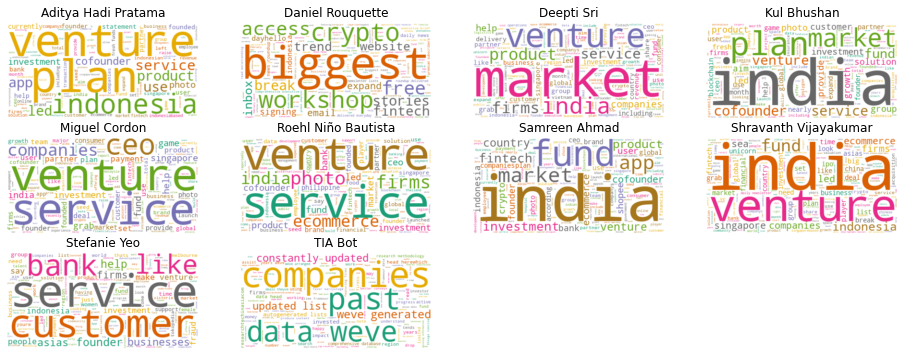

In [50]:
# Reset the output dimensions

plt.rcParams['figure.figsize'] = [16, 6]

full_names = data_clean.author_name.values

# Create subplots for each author
for index, author in enumerate(data.columns):
    wc.generate(data_clean.content[author])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(full_names[index])
    
plt.show()

### Findings:
- 6 of 10 wordclouds contain India, our articles are heavily India-based.
- 1 of 10 contains Indonesia as their big part of articles.
- Since TIA is SEA digital news, we need to add more articles to other SEA countries as well.